## Question 2: Kolmogorov-Smirnov Test

Ks_2sampResult(statistic=0.2916666666666667, pvalue=0.7432404540763674)
KS Distance: 0.291667
P_KS: 0.808819
KS Distance for angular dist: 0.575142
P_KS for angular dist: 0.000004


Text(0, 0.5, 'Probability')

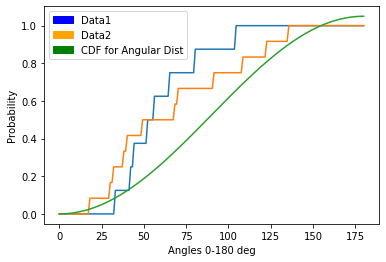

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.special import kolmogorov
from scipy.stats import kstwobign
import matplotlib.patches as mpatches

Data1 = [80, 44, 56, 65, 33, 52, 42, 104]
Data2 = [18, 40, 108, 70, 135, 68, 32, 30, 38, 122, 49, 91]
Data3 = Data1+Data2

test = []
for x in range(181):
    test.append(x)
    

Data1_sorted = np.sort(Data1)
Data2_sorted = np.sort(Data2)
Data3_sorted = np.sort(Data3)


#stats.kstest(Data1, 'norm')
kst = stats.ks_2samp(Data1, Data2)
print(kst)

#print(np.sort(Data1))
#DataY1 = np.cumsum(np.sort(Data1))/ np.sum(Data1)
#DataY2 = np.cumsum(np.sort(Data2))/np.sum(Data2)

Datay1 = np.linspace(1/len(Data1), 1, len(Data1))
Datay2 = np.linspace(1/len(Data2), 1, len(Data2))
Datay3 = np.linspace(1/len(Data3), 1, len(Data3))

F1 = interp1d(np.sort(Data1), Datay1, kind="previous", bounds_error = False, fill_value = (0,1)) #interpolation for Data set 1
F2 = interp1d(np.sort(Data2), Datay2, kind="previous", bounds_error = False, fill_value = (0,1)) #interpolation for data set 2
F3 = interp1d(np.sort(Data3), Datay3, kind="previous", bounds_error = False, fill_value = (0,1))



diffmax =0
for deg in Data1+Data2:
    diff = np.abs(F1(deg)-F2(deg))
    diffmax= diff if diff > diffmax else diffmax
    
    
print('KS Distance: %f' %diffmax) #i


S = np.sqrt((len(Data1)*len(Data2)) / (len(Data1)+len(Data2))) #critical values (i.e big sqrt)


P_KS = kolmogorov(diffmax*S) #here we dont use 1- F_k because kolmogorov from scipy gives the complementary cum dist 
print('P_KS: %f' %P_KS) #ii

gamma = 0.1
thetaD = np.linspace(0,180,180)
thetaR = thetaD*(np.pi/180)
#E = (gamma*np.sin(theta)+theta)*(180/np.pi) #integral of dist over theta
def angular_cdf(theta, gamma): 
    return -0.5*(1.+gamma/2.)*(np.cos(theta) - 1.) 

def angular(theta, gamma):
    return 1 + gamma*np.cos(theta)
#calculating diff_max for expected vs data3=data1+data2
KSD_A = 0
for angle in Data3:
    diff_A = np.abs(angular_cdf(angle, gamma) - F3(angle))
    KSD_A = diff_A if diff_A > KSD_A else KSD_A

    
print('KS Distance for angular dist: %f' %KSD_A)

S_A = np.sqrt((len(Data1)+len(Data2)))
P_KS_A = kolmogorov(KSD_A*S_A) # 0.35456057524597623

print('P_KS for angular dist: %f' %(P_KS_A))

x = np.linspace(0,180,180)
plt.plot(x, F1(x))
plt.plot(x,F2(x))
plt.plot(x, angular_cdf(thetaR,gamma))
blue_patch = mpatches.Patch(color='blue', label='Data1')
orange_patch = mpatches.Patch(color='orange', label='Data2')
green_patch =  mpatches.Patch(color='green', label='CDF for Angular Dist')
plt.legend(handles=[blue_patch, orange_patch, green_patch])
plt.xlabel('Angles 0-180 deg')
plt.ylabel('Probability')

As we can see the two angle distributions (Data1 & Data2) out calculations indicate that they do indded originate from the same source as the P value is fairly high. The null hypothesis (H_0) is that the sample follows the distribution and we accept it. Interestingly the in built stats.ks_2samp gives a more accurate result but still similar. The test statistic is also less than the critical value up to a signifiance level of 0.001 which correlates our results. 

For the combined data set vs the expected distribution we find that the two samples were from populations with different distributions i.e originate from different sources and they are not compatible. 

Even though my results lead me to what I presume is the correct answer I believe my actual numbers for the P-Value and D-test statistic are off but I was unable to find out why. 